## 聚类分析的定义
聚类分析是根据在数据中发现的描述对象及其关系的信息，将数据对象分组。目的是，组内的对象相互之间是相似的（相关的），而不同组中的对象是不同的（不相关的）。组内相似性越大，组间差距越大，说明聚类效果越好。

**聚类效果的好坏依赖于两个因素**：
1. 衡量距离的方法（distance measurement） 
2. 聚类算法（algorithm）


**问题的引出**

我们很多时候逛电商网站都会收到一些推销活动的通知，但是我们之前也没关注过那个商品，这些电商网站是为什么决定给我们推销这个商品的呢？这是因为电商网站，可以根据用户的年龄、性别、地址以及历史数据等等信息，将其分为，比如“年轻白领”、“一家三口”、“家有一老”、”初得子女“等等类型，然后你属于其中的某一类，电商网站根据这类用户的特征向其发起不同的优惠活动。那在利用用户的这些数据将用户分为不同的类别时，就会用到聚类分析。


## 聚类算法


In [24]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [23]:

df_iris = datasets.load_iris()
df_iris = pd.DataFrame(data=df_iris.data, columns=df_iris.feature_names)
df_iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


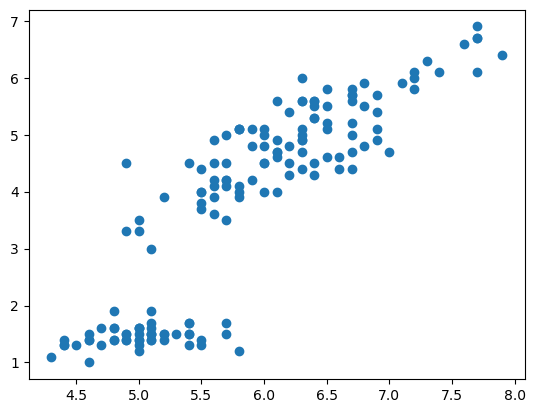

In [25]:

x_axis = df_iris.iloc[:, 0]
y_axis = df_iris.iloc[:, 2]
plt.scatter(x_axis, y_axis)
plt.show()


### K-均值聚类（k-means）

#### 算法步骤
1. 选择 K 个初始质心，初始质心随机选择即可，每一个质心为一个类
2. 把每个观测指派到离它最近的质心，与质心形成新的类
3. 重新计算每个类的质心，所谓质心就是一个类中的所有观测的平均向量（这里称为向量，是因为每一个观测都包含很多变量，所以我们把一个观测视为一个多维向量，维数由变量数决定）。
4. 重复2. 和 3.5. 直到质心不在发生变化时或者到达最大迭代次数时




原理： 在K均值聚类的过程中，首先随机地将3个数据点分到三个簇中，并将该3个点视为当前簇的质心。基于接下来每个点到这3个初始点之间的质心距离，确定下一个给定的输入数据点将被划分到哪一个簇中。待所有点归类结束，重新计算所有簇的质心，然后再次计算每一个点到质心的距离。该过程不断重复，直至满足收敛状态。

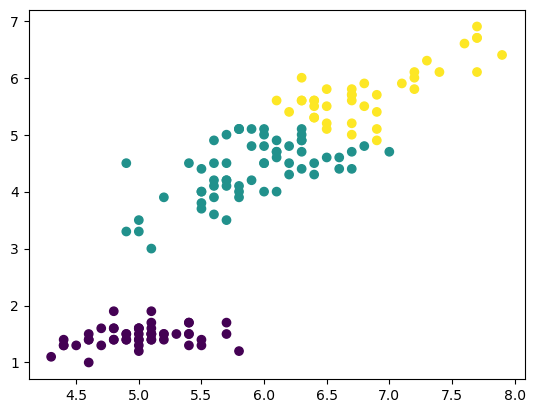

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df_iris)

all_prediction = kmeans.predict(df_iris)

# 对比之前的分布
x_axis = df_iris.iloc[:, 0]
y_axis = df_iris.iloc[:, 2]
plt.scatter(x_axis, y_axis, c=all_prediction) # c参数为画图点颜色
plt.show()

### 均值漂移聚类
#### 算法步骤

1. 设想在一个有N个样本点的特征空间

2. 初始确定一个中心点center，计算在设置的半径为D的圆形空间内所有的点（xi）与中心点center的向量

3. 计算整个圆形空间内所有向量的平均值，得到一个偏移均值

4. 将中心点center移动到偏移均值位置

5. 重复移动，直到满足一定条件结束

K均值聚类对噪声的鲁棒性没有均值漂移聚类强，初始点选择不当会导致K均值聚类陷入局部最小值问题，且均值漂移聚类是一个单参数算法，容易作为一个模块和别的算法集成。因此，我们可以使用均值漂移聚类对数据集进行初步聚类，从而达到去噪的目的，然后再使用每一簇的质心代表整个簇，通过K均值聚类得到指定数量的簇

In [26]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import normalize

In [28]:
x = normalize(df_iris, axis=0, norm='max') # 在均值漂移聚类之前需要对数据进行归一化, axis为对列归一化，norm归一化的方式
x

array([[0.64556962, 0.79545455, 0.20289855, 0.08      ],
       [0.62025316, 0.68181818, 0.20289855, 0.08      ],
       [0.59493671, 0.72727273, 0.1884058 , 0.08      ],
       [0.58227848, 0.70454545, 0.2173913 , 0.08      ],
       [0.63291139, 0.81818182, 0.20289855, 0.08      ],
       [0.6835443 , 0.88636364, 0.24637681, 0.16      ],
       [0.58227848, 0.77272727, 0.20289855, 0.12      ],
       [0.63291139, 0.77272727, 0.2173913 , 0.08      ],
       [0.55696203, 0.65909091, 0.20289855, 0.08      ],
       [0.62025316, 0.70454545, 0.2173913 , 0.04      ],
       [0.6835443 , 0.84090909, 0.2173913 , 0.08      ],
       [0.60759494, 0.77272727, 0.23188406, 0.08      ],
       [0.60759494, 0.68181818, 0.20289855, 0.04      ],
       [0.5443038 , 0.68181818, 0.15942029, 0.04      ],
       [0.73417722, 0.90909091, 0.17391304, 0.08      ],
       [0.72151899, 1.        , 0.2173913 , 0.16      ],
       [0.6835443 , 0.88636364, 0.1884058 , 0.16      ],
       [0.64556962, 0.79545455,

In [34]:
ms = MeanShift(bandwidth=0.05, n_jobs=1)  # bandwidth:表示带宽，可以理解为设定的质心圆的半径, n_jobs电脑cpu的工作个数
ms.fit(x)
MeanShift(bandwidth=0.05, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)
center_ = ms.cluster_centers_
center_

array([[0.61075949, 0.71022727, 0.21014493, 0.07333333],
       [0.63924051, 0.78409091, 0.20869565, 0.088     ],
       [0.71729958, 0.65151515, 0.61111111, 0.51333333],
       [0.6556962 , 0.84545455, 0.2173913 , 0.088     ],
       [0.77848101, 0.65340909, 0.70289855, 0.72      ],
       [0.81012658, 0.68181818, 0.80193237, 0.72      ],
       [0.76793249, 0.66666667, 0.66666667, 0.57333333],
       [0.70042194, 0.5530303 , 0.55072464, 0.42666667],
       [0.86708861, 0.72727273, 0.84057971, 0.92      ],
       [0.86708861, 0.69318182, 0.78985507, 0.84      ],
       [0.86075949, 0.70454545, 0.69565217, 0.6       ],
       [0.86075949, 0.69318182, 0.74637681, 0.92      ],
       [0.84177215, 0.69318182, 0.63768116, 0.56      ],
       [0.82278481, 0.70454545, 0.74637681, 0.8       ],
       [0.81012658, 0.63636364, 0.8115942 , 0.86      ],
       [0.79746835, 0.65909091, 0.62318841, 0.52      ],
       [0.73417722, 0.61363636, 0.73913043, 0.76      ],
       [0.73417722, 0.60227273,

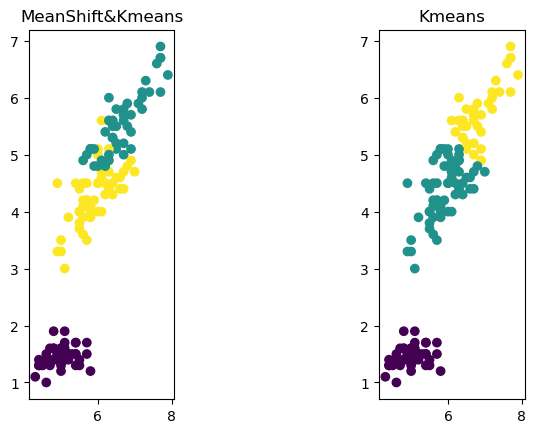

In [37]:

# 用均值漂移聚类形成中心点， 进行kmeans聚类
model = KMeans(n_clusters=3)
model.fit(center_)

predict_labels = model.predict(x)

# 对比之前的分布
subplot1 = plt.subplot(1,3,1)
x_axis = df_iris.iloc[:, 0]
y_axis = df_iris.iloc[:, 2]
subplot1.scatter(x_axis, y_axis, c=predict_labels) # c参数为画图点颜色
subplot1.set_title("MeanShift&Kmeans")

subplot3 = plt.subplot(1,3,3)
subplot3.scatter(x_axis, y_axis, c=all_prediction) # c参数为画图点颜色
subplot3.set_title('Kmeans')

plt.show()

### 层次聚类(Hierarchical)

其核心思想是，把每一个单个的观测都视为一个类，而后计算各类之间的距离，选取最相近的两个类，将它们合并为一个类。新的这些类再继续计算距离，合并到最近的两个类。如此往复，最后就只有一个类。然后用树状图记录这个过程，这个树状图就包含了我们所需要的信息。

#### 算法步骤
1. 计算类与类之间的距离，用邻近度矩阵记录
2. 将最近的两个类合并为一个新的类
3. 根据新的类，更新邻近度矩阵
4. 重复2. 3.
5. 到只只剩下一个类的时候，停止


In [38]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt


In [39]:
# 加载 iris 数据
iris = load_iris()
X = iris.data
y = iris.target  # 真实标签（对比用）
feature_names = iris.feature_names


In [40]:
# 层次聚类对尺度敏感，所以需要标准化。
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# 生成聚类树
Z = linkage(X_scaled, method='ward')

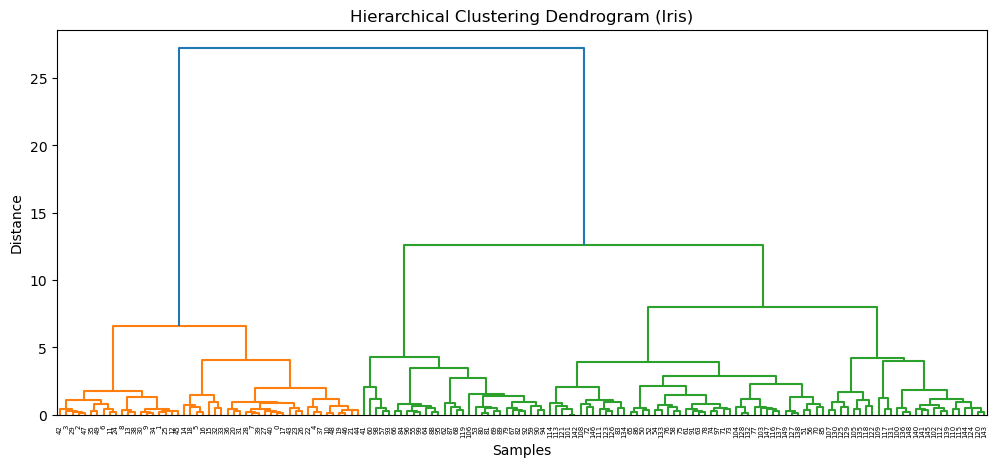

In [42]:
# 绘制树状图
plt.figure(figsize=(12, 5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()


In [43]:
# 依据阈值或簇数划分聚类结果（例如分 3 类）
clusters = fcluster(Z, t=3, criterion='maxclust')



[1 1 1 1 1 1 1 1 1 1]


In [44]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y, clusters)
print("ARI（调整兰德指数）:", ari)


ARI（调整兰德指数）: 0.6153229932145449


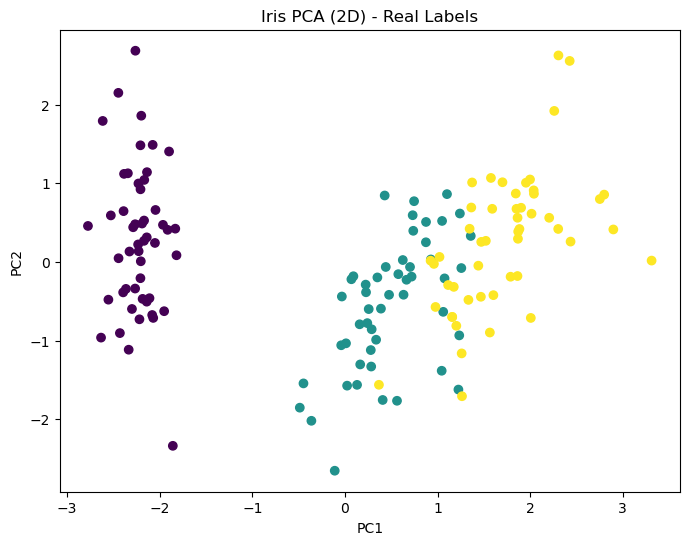

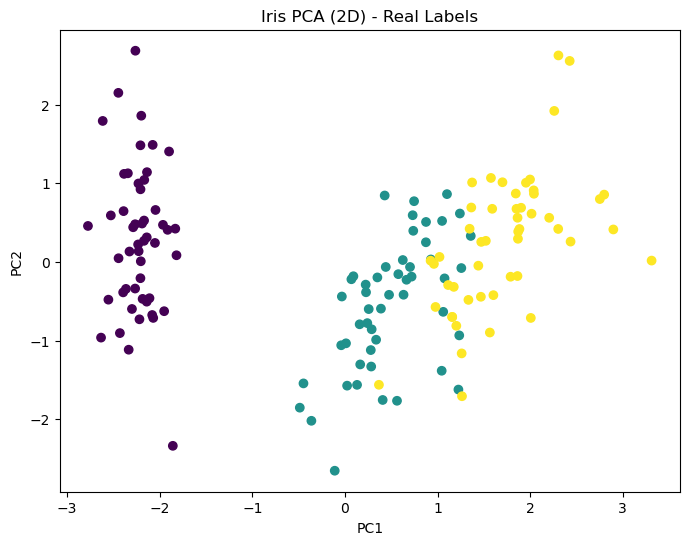

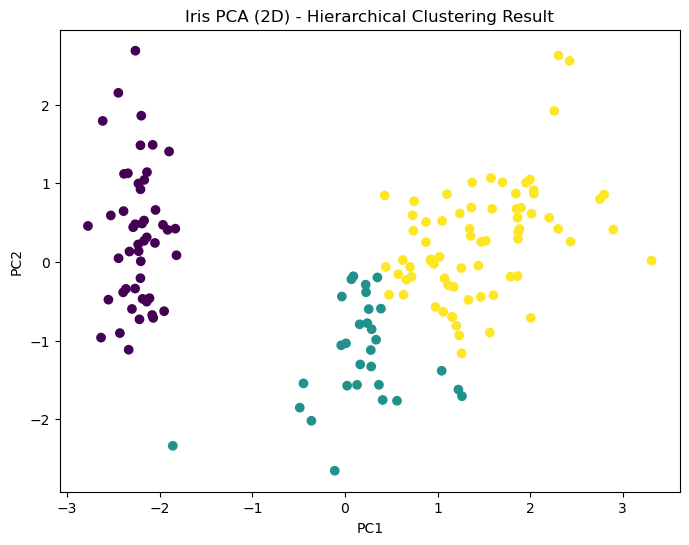

In [46]:
df_iris = datasets.load_iris()
df_iris = pd.DataFrame(data=df_iris.data, columns=df_iris.feature_names)

## 聚类分析应用场景


### 一、用户分群（User Segmentation）

聚类分析最典型的应用，就是把“看起来一样的用户”分成不同群体，让产品、运营能做更精准的策略。

#### 常见用途：

* **行为分群**：按使用频率、功能偏好、时段偏好进行聚类
* **价值分群**：按充值金额、GMV、活跃度分群
* **生命周期分群**：新用户、活跃用户、回流用户、流失用户

#### 产品经理价值：

* 更精准做个性化推荐
* 更容易找到高价值用户，并针对性运营
* 避免一刀切策略，提升整体留存与转化

---

### 二、营销与运营策略优化（精准运营）

将用户聚类后，可以为不同用户群制定不同的触达策略。

#### 例子

* 高频高活跃用户 → 推高级功能、会员权益
* 低活跃用户 → 提供促活内容或优惠券
* 潜在流失用户 → 提前召回

#### 产品价值：

* 提升召回率
* 提升活动 ROI
* 降低营销成本（不再“广撒网”）

---

### 三、内容/推荐系统优化

聚类不仅能对用户分群，也能对内容、商品分群。

#### 内容/商品聚类用途：

* 找到类似内容/商品（主题、价位、风格）
* 优化推荐策略
* 建立自动化标签系统

#### 产品场景：

* 视频/资讯类：按内容聚类，提升分发效率
* 电商类：按商品价格/功能聚类，提升推荐准确度
* 教育类：按课程难度/主题聚类，提高体验


---

### 四、产品定位与人群洞察（支持产品策略）

聚类分析能帮助产品经理洞察目标人群结构，以指导产品策略。

#### 例子：

通过聚类发现用户主要是以下三群体：

* 学生用户：对学习工具需求高
* 白领用户：碎片时间内容消费高
* 家庭用户：偏好生活工具与购物

这可以用于：

* 产品功能规划
* 市场定位
* 上线优先级判断

---

#### 总结：一句话概括

> **聚类分析的本质是在杂乱用户/内容中找出“相似的小群体”，从而帮助产品经理做更精准的运营、推荐、用户洞察和策略制定。**